In [69]:
import pandas as pd
import numpy as np
import os
import math
#import teetool as tt
import scipy
from scipy import interpolate

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from collections import OrderedDict

In [6]:
# SETTINGS
M = -1 # resampling (reduces points, doesn't interpolate), negative turns off
store_this_case_x = "t2 [-]" # choose dimension!

In [16]:
# read data

df = pd.read_csv("data/aircraft_trajectories.csv")

# rename columns
#df.rename(columns={'EASTINGS_M': 'x [m]',
#                   'NORTHINGS_M': 'y [m]',
#                   'ALTITUDE_M': 'z [m]'}, inplace=True)



0      -5.415550e+04
1      -5.415245e+04
2      -5.414692e+04
3      -5.414820e+04
4      -5.416103e+04
            ...     
5445    1.079189e+06
5446    1.079191e+06
5447    1.079194e+06
5448    1.079194e+06
5449    1.079194e+06
Name: EASTINGS_M, Length: 5450, dtype: float64
0      -5.415550e+04
1      -5.415245e+04
2      -5.414692e+04
3      -5.414820e+04
4      -5.416103e+04
            ...     
2720    1.088016e+06
2721    1.087796e+06
2722    1.087546e+06
2723    1.087326e+06
2724    1.087055e+06
Name: EASTINGS_M, Length: 2725, dtype: float64
2725    1086821.642
2726    1086584.884
2727    1086364.722
2728    1086121.870
2729    1085901.628
           ...     
5445    1079188.934
5446    1079191.420
5447    1079193.825
5448    1079193.825
5449    1079193.825
Name: EASTINGS_M, Length: 2725, dtype: float64


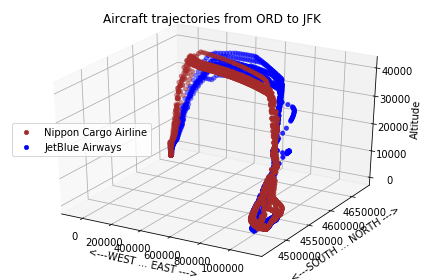

In [115]:
# 3d plot

fig = plt.figure()
ax = plt.axes(projection='3d')
print(df.EASTINGS_M)

#for i in len(df.EASTINGS_M):
#    if

x = df.EASTINGS_M
y = df.NORTHINGS_M
z = df.ALTITUDE_M


#EASTINGS_M_0 = [a for a in df.EASTINGS_M if df.CLUSTER_ID == 0]
#EASTINGS_M_0 = list(filter(lambda x: df.CLUSTER_ID == 0, df))
#EASTINGS_M_0 = df.EASTINGS_M - df.
EASTINGS_M_0 = x[:len(x)//2]
NORTHINGS_M_0 = y[:len(y)//2]
ALTITUDE_M_0 = z[:len(z)//2]
#np.vsplit(x,2)[0]
EASTINGS_M_1 = x[len(x)//2:]
NORTHINGS_M_1 = y[len(y)//2:]
ALTITUDE_M_1 = z[len(z)//2:]
#np.vslpit(x,2)[1]

print(EASTINGS_M_0)
print(EASTINGS_M_1)

ax.scatter(EASTINGS_M_0, NORTHINGS_M_0, ALTITUDE_M_0, cmap='viridis', label='Nippon Cargo Airline', linewidth=0.5,color='brown')
ax.scatter(EASTINGS_M_1, NORTHINGS_M_1, ALTITUDE_M_1, cmap='viridis', label='JetBlue Airways', linewidth=0.5,color='blue')

ax.set_title('Aircraft trajectories from ORD to JFK')
ax.set_xlabel('<---WEST ... EAST --->')
ax.set_ylabel('<---SOUTH ... NORTH --->')
ax.set_zlabel('Altitude')

#ax.legend('Nippon Cargo Airline flight KZ7159','JetBlue Airways flight B6906')
ax.legend(loc='center left')

plt.tight_layout()
plt.show()

     CLUSTER_ID  TRAJECTORY_ID    EASTINGS_M  NORTHINGS_M  ALTITUDE_M
0             1              0 -5.415550e+04  4645661.443           0
1             1              0 -5.415245e+04  4645641.120           0
2             1              0 -5.414692e+04  4645615.356           0
3             1              0 -5.414820e+04  4645592.034           0
4             1              0 -5.416103e+04  4645568.713           0
..          ...            ...           ...          ...         ...
306           1              0  1.077446e+06  4500702.546           0
307           1              0  1.077447e+06  4500758.406           0
308           1              0  1.077447e+06  4500835.922           0
309           1              0  1.077376e+06  4500847.360           0
310           1              0  1.077343e+06  4500848.693           0

[311 rows x 5 columns]
      CLUSTER_ID  TRAJECTORY_ID    EASTINGS_M  NORTHINGS_M  ALTITUDE_M
2804           2              9 -5.349918e+04  4646943.895       

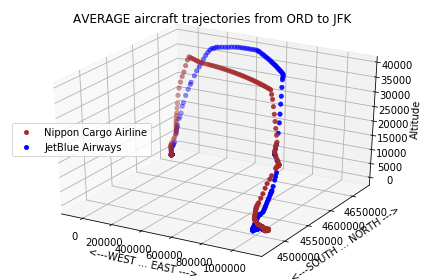

In [135]:
# Find the average curves and their standard deviations

fig = plt.figure()
ax = plt.axes(projection='3d')

NipponCargo_Avg = df[0:311]
JetBlue_Avg = df[2804:3137]
#np.vsplit(df,18)[0]
#JetBlue_Avg = np.vsplit(df,18)[9]

print(NipponCargo_Avg)
print(JetBlue_Avg)

x1 = NipponCargo_Avg.EASTINGS_M
y1 = NipponCargo_Avg.NORTHINGS_M
z1 = NipponCargo_Avg.ALTITUDE_M

x2 = JetBlue_Avg.EASTINGS_M
y2 = JetBlue_Avg.NORTHINGS_M
z2 = JetBlue_Avg.ALTITUDE_M


#EASTINGS_M_0 = [a for a in df.EASTINGS_M if df.CLUSTER_ID == 0]
#EASTINGS_M_0 = list(filter(lambda x: df.CLUSTER_ID == 0, df))
#EASTINGS_M_0 = df.EASTINGS_M - df.

#EASTINGS_M_Nippon_Avg = x1[:len(x1)//2]
#NORTHINGS_M_Nippon_Avg = y1[:len(y1)//2]
#ALTITUDE_M_Nippon_Avg = z1[:len(z1)//2]

#np.vsplit(x,2)[0]

#EASTINGS_M_JB = x2[len(x2)//2:]
#NORTHINGS_M_JB = y2[len(y2)//2:]
#ALTITUDE_M_JB = z2[len(z2)//2:]

#np.vslpit(x,2)[1]

#print(EASTINGS_M_0)
#print(EASTINGS_M_1)

print(x1)
print(y1)
print(z1)

ax.scatter(x1,y1,z1, cmap='viridis', label='Nippon Cargo Airline', linewidth=0.5,color='brown')
ax.scatter(x2, y2, z2, cmap='viridis', label='JetBlue Airways', linewidth=0.5,color='blue')

ax.set_title('AVERAGE aircraft trajectories from ORD to JFK')
ax.set_xlabel('<---WEST ... EAST --->')
ax.set_ylabel('<---SOUTH ... NORTH --->')
ax.set_zlabel('Altitude')

#ax.legend('Nippon Cargo Airline flight KZ7159','JetBlue Airways flight B6906')
ax.legend(loc='center left')

plt.tight_layout()
plt.show()


#x = np.linspace(0, 1000000, 10000)
#y = np.linspace(250000, 750000, 10000)
#X, Y = np.meshgrid(x,y)

#Ti = scipy.interpolate.griddata((EASTINGS_M_0, NORTHINGS_M_0), ALTITUDE_M_0, (X,Y), method='cubic')
#ax.contourf(X, Y, Ti)

#bin0 = df[df[, "two"] < 0]
#bin0 = df[df$EASTINGS_M < 0, ]

#print(bin0)

#plt.tight_layout()
#plt.show()

#print(X)
#print(Y)




In [63]:
print(Ti)

print(len(Ti))

print(Ti[15])


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
10000
[nan nan nan ... nan nan nan]


In [113]:
# Find the average curve's avoidance of Cleveland
# That is, find the minimum distance from the curve
# to Cleveland's position on the graph

# To do this, we will have to write a distance
# function and minimize this function

# Cleveland is located at 41.4993 latitude, -81.6944 longitude
# Which converts
# (using https://www.latlong.net/lat-long-utm.html)
# to be: 442042 Easting, 4594419 Northing 
# in UTM Zone 17T

def distance_from_cleveland(x1,y1):
    dist = math.sqrt((442042-x1)**2 + (4594419-y1)**2)
    return dist

#NipponCargo = np.vsplit(df, 2)[0]
#JetBlue = np.vsplit(df,2)[1]

NipponCargoDistances = [0]*len(EASTINGS_M_0)
print(len(EASTINGS_M_0))
print(EASTINGS_M_0[2])

for i in range(0,len(EASTINGS_M_0)):
    #print(i)
    NipponCargoDistances[i] = distance_from_cleveland(EASTINGS_M_0[i],NORTHINGS_M_0[i])

print(NipponCargoDistances)
min_distance_NipponCargo = min(NipponCargoDistances)
print(min_distance_NipponCargo)

index =NipponCargoDistances.index(min(NipponCargoDistances))
closest_to_cleveland_NipponCargo_EASTINGS = EASTINGS_M_0[index]
closest_to_cleveland_NipponCargo_NORTHINGS = NORTHINGS_M_0[index]

print("These trajectories get rather close to Cleveland; the mean trajectory passes within 18906m, or 18km, of downtown Cleveland")
print(min_distance_NipponCargo)

JetBlueDistances = [0]*len(EASTINGS_M_1)

print(len(EASTINGS_M_1))

for j in range(2725,2725+len(EASTINGS_M_1)):
    #print(j)
    JetBlueDistances[j-2725] = distance_from_cleveland(EASTINGS_M_1[j],NORTHINGS_M_1[j])

print(JetBlueDistances)
    
min_distance_JetBlue = min(JetBlueDistances)
print(min_distance_JetBlue)

index_JB = JetBlueDistances.index(min(JetBlueDistances))
print(index)
closest_to_cleveland_JetBlue_EASTINGS = EASTINGS_M_1[2725+index_JB]
closest_to_cleveland_JetBlue_NORTHINGS = NORTHINGS_M_1[2725+index_JB]




print("**********")
print("Nippon Cargo's mean trajectory gets closest to Cleveland at the point")
print("EASTINGS =")
print(closest_to_cleveland_NipponCargo_EASTINGS)
print("and NORTHINGS =")
print(closest_to_cleveland_NipponCargo_NORTHINGS)
print("where it is ")
print(min_distance_NipponCargo / 1000)
print("kilometers from downtown Cleveland")

print("***")
print("JetBlue's mean trajectory gets closest to Cleveland at the point")
print("EASTINGS =")
print(closest_to_cleveland_JetBlue_EASTINGS)
print("and NORTHINGS =")
print(closest_to_cleveland_JetBlue_NORTHINGS)
print("where it is ")
print(min_distance_JetBlue / 1000)
print("kilometers from downtown Cleveland")

2725
-54146.918789999996
[498836.3905724385, 498831.27275788045, 498823.1249628149, 498822.007897296, 498832.37645885954, 498833.31087260775, 498812.01684133115, 498778.60038162646, 498760.3369830227, 498716.6095689138, 498691.7267234429, 498671.6290593807, 498646.52986301365, 498619.17471845064, 498596.6047417776, 498550.31410003174, 498528.2460061851, 498506.55491685675, 498470.1808294344, 498440.65529363777, 498414.9697254816, 498373.57938395225, 498330.68939444114, 498302.5684963055, 498258.7984579589, 498224.8717642985, 498167.10011848545, 498125.1066683032, 498015.0204544158, 497965.05234620685, 497918.2862475368, 497864.77549081447, 497812.3812559273, 497705.44023244514, 497643.9549964035, 497586.7761957243, 497487.61658119917, 497412.81390023755, 497351.967030077, 497294.7885963272, 497244.8671765099, 497196.22174764046, 497147.53050916444, 497111.61072653777, 497081.7094029063, 497063.86966480466, 497043.5108076741, 497025.7817279207, 497006.0524769118, 496986.32491060067, 496